In [13]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv("./abalone.csv", header=None)
X = df.drop(df.columns[7], axis=1)
y = df[7]

## Null Model

In [2]:
test_mse = 0
train_mse = 0

for _ in range(20):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)
    y_bar = round(np.mean(y_train))
    model = DummyClassifier(strategy='constant', constant=y_bar)
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    train_mse += mean_squared_error(y_train, predictions)
    predictions = model.predict(X_test)
    test_mse += mean_squared_error(y_test, predictions)

null_train_mse = train_mse/20
null_test_mse = test_mse/20

print(f'Train MSE: {null_train_mse}\nTest MSE: {null_test_mse}')

Train MSE: 10.483478873239438
Test MSE: 9.908532695374802


## Ordinary Least Squares Regression

In [3]:
total_train_rsq = 0
total_test_rsq = 0
total_train_mse = 0
total_test_mse = 0
lamb = .0001

for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)
    X_train.insert(0, None, 1)
    X_test.insert(0, None, 1)
    train_coefficients = np.linalg.inv(X_train.T.dot(X_train) + lamb*(np.eye(8)))\
        .dot(X_train.T.dot(y_train))
    
    predictions = X_train.dot(train_coefficients)
    total_train_rsq += r2_score(y_train, predictions)
    total_train_mse += mean_squared_error(y_train, predictions)
    
    predictions = X_test.dot(train_coefficients)
    total_test_rsq += r2_score(y_test, predictions)
    total_test_mse += mean_squared_error(y_test, predictions)
    
ols_train_rsq = total_train_rsq/20
ols_test_rsq = total_test_rsq/20
ols_train_mse = total_train_mse/20
ols_test_mse = total_test_mse/20

print(f'Train R^2: {ols_train_rsq}\nTest R^2: {ols_test_rsq}')
print(f'Train MSE: {ols_train_mse}\nTest MSE: {ols_test_mse}')

Train R^2: 0.5298886703569974
Test R^2: 0.5036473092800076
Train MSE: 4.8790095561382145
Test MSE: 5.171138599786219


## Regression Trees

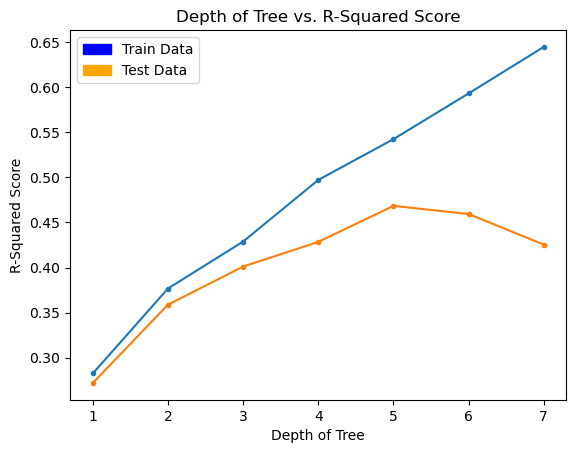

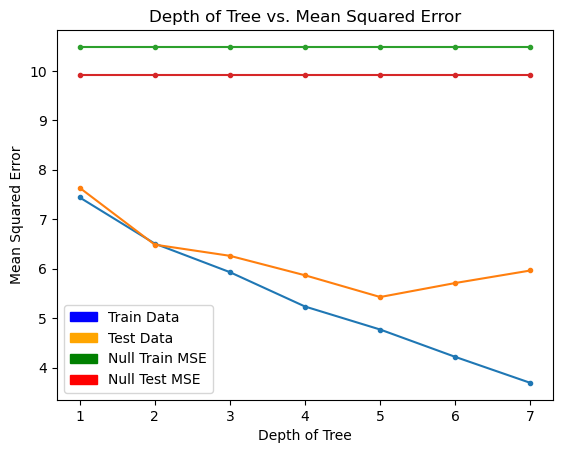

In [12]:
train_rsq_list = []
test_rsq_list = []
train_mse_list = []
test_mse_list = []
null_train_mse_list = []
null_test_mse_list = []

x = [1, 2, 3, 4, 5, 6, 7]
for i in x:
    train_rsq = 0
    test_rsq = 0
    train_mse = 0
    test_mse = 0
    for _ in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)
        regression_tree = DecisionTreeRegressor(max_depth=i)
        regression_tree.fit(X_train.values, y_train.values)
        
        predictions = regression_tree.predict(X_train.values)
        train_rsq += r2_score(y_train, predictions)
        train_mse += mean_squared_error(y_train, predictions)

        predictions = regression_tree.predict(X_test.values)
        test_rsq += r2_score(y_test, predictions)
        test_mse += mean_squared_error(y_test, predictions)

    train_rsq_list.append(train_R_sq/20)
    test_rsq_list.append(test_R_sq/20)
    train_mse_list.append(train_mse/20)
    test_mse_list.append(test_mse/20)
    null_train_mse_list.append(null_train_mse)
    null_test_mse_list.append(null_test_mse)
    
plt.plot(x, train_rsq_list, x, test_rsq_list, marker='.')
plt.xlabel('Depth of Tree')
plt.ylabel('R-Squared Score')
plt.title('Depth of Tree vs. R-Squared Score')
train_label = mpatches.Patch(color='blue', label='Train Data')
test_label = mpatches.Patch(color='orange', label='Test Data')
plt.legend(handles=[train_label, test_label], loc='upper left')
plt.xticks(x)
plt.show()

plt.plot(x, train_mse_list, x, test_mse_list, x, null_train_mse_list, x,
         null_test_mse_list, marker='.')
plt.xlabel('Depth of Tree')
plt.ylabel('Mean Squared Error')
plt.title('Depth of Tree vs. Mean Squared Error')
train_label = mpatches.Patch(color='blue', label='Train Data')
test_label = mpatches.Patch(color='orange', label='Test Data')
null_train_label = mpatches.Patch(color='green', label='Null Train MSE')
null_test_label = mpatches.Patch(color='red', label='Null Test MSE')
plt.legend(handles=[train_label, test_label, null_train_label, 
                    null_test_label], loc='lower left')
plt.xticks(x)
plt.show()

## Random Forest Regression

In [15]:
train_mse_list = []
test_mse_list = []
train_rsq_list = []
test_rsq_list = []
x = [10, 30, 100, 300]

for i in x:
    
    train_mse = 0
    test_mse = 0
    train_rsq = 0
    test_rsq = 0
    
    for _ in range(20):
        
        forest = RandomForestRegressor(n_estimators=i)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)
        forest.fit(X_train.values, y_train.values)
        predictions = forest.predict(X_train.values)
        train_mse += mean_squared_error(y_train.values, predictions)

        predictions = forest.predict(X_test.values)
        test_mse += mean_squared_error(y_test.values, predictions)

        predictions = forest.predict(X_train.values)
        train_rsq += r2_score(y_train.values, predictions)

        predictions = forest.predict(X_test.values)
        test_rsq += r2_score(y_test.values, predictions)

    train_mse_list.append(train_mse/20)
    test_mse_list.append(test_mse/20)
    train_rsq_list.append(train_rsq/20)
    test_rsq_list.append(test_rsq/20)
    
table = pd.DataFrame()
table['# of Trees'] = x
table['Train Data MSE'] = train_mse_list
table['Test Data MSE'] = test_mse_list
table['Train Data R2 Score'] = train_rsq_list
table['Test Data R2 Score'] = test_rsq_list
table

,# of Trees,Train Data MSE,Test Data MSE,Train Data R2 Score,Test Data R2 Score
0,10,0.928074,5.106495,0.910769,0.505054
1,30,0.739486,4.794520,0.928890,0.535824
2,100,0.670124,4.794929,0.935612,0.534010
3,300,0.650612,4.917320,0.937495,0.520783
